<a href="https://colab.research.google.com/github/mrterranova/mec2-projects/blob/Student-MLE-MiniProject-Logistic-Regression/Student_MLE_MiniProject_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini Project: Logistic Regression

Logistic Regression models the probability that a given input belongs to a certain class. It's suitable when the target variable is categorical and represents two classes (e.g., 0 or 1, True or False, Yes or No), although it can also be extended for problems with more than two classes. The key idea behind logistic regression is to model the relationship between the input variables (features) and the probability of the outcome.

In logistic regression, the linear combination of input features is transformed using a logistic function (also known as the sigmoid function), which ensures that the output is between 0 and 1. This output can be interpreted as the probability of the instance belonging to a particular class.

**Advantages of Logistic Regression:**

1. **Simple and Interpretable:** Logistic regression is a straightforward algorithm that's relatively easy to understand and interpret. The output is the probability of belonging to a certain class, and the coefficients associated with each feature provide insights into feature importance.

2. **Efficient for Small Datasets:** It works well with small datasets where the number of samples is not very large. It's less prone to overfitting in such cases compared to complex models.

3. **Works Well for Linearly Separable Data:** When the classes are separable by a linear decision boundary, logistic regression can perform quite well.

4. **Good Starting Point:** Logistic regression is often used as a starting point for understanding a classification problem. It can serve as a baseline model against which more complex algorithms can be compared.

5. **Regularization:** Logistic regression can be regularized to prevent overfitting. Regularization techniques like L1 (Lasso) and L2 (Ridge) regularization can be applied to control the complexity of the model.

6. **Probability Estimation:** Logistic regression not only provides class predictions but also outputs the probability of the prediction. This can be useful for decision-making in cases where the cost of misclassification varies.

However, it's important to note that logistic regression also has its limitations. It assumes a linear relationship between features and the log-odds of the target variable, which might not be suitable for highly complex relationships. Additionally, it might struggle with handling non-linear data without feature transformations. In such cases, more advanced techniques like decision trees, random forests, or neural networks might be more appropriate.

In this project you'll get some experience building a logistic regression model for the [Wisconsin Breast Cancer Detection dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html). Note, the task of training a logistic regression model has largely been asbtracted away by libraries like Scikit-Learn. In this mini-project we'll focus more on model evaluation and interpretation.  


First, let's import all the libraries we'll be using.

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

Logistic Regression, like many statistical methods, comes with certain assumptions about the underlying data. Here are the main assumptions associated with logistic regression:

1. **Binary Outcome:** Logistic regression is designed for binary classification problems, where the dependent variable (target) should have two categories or levels. If you have a multi-class problem, you would typically use multinomial logistic regression or other appropriate techniques.

2. **Independence of Observations:** The observations (samples) should be independent of each other. This means that the outcome of one observation should not be influenced by the outcome of another observation. This assumption is often met when the data is collected using random sampling or experimental designs.

3. **Linearity of Log-Odds:** The relationship between the log-odds of the outcome and the predictors should be linear. In other words, the log-odds of the outcome variable should change linearly with changes in the predictor variables. This assumption can be checked by examining scatter plots and residual plots.

4. **No Multicollinearity:** There should not be high multicollinearity among the predictor variables. Multicollinearity can make it difficult to determine the individual effect of each predictor on the outcome. Techniques like variance inflation factor (VIF) can be used to assess multicollinearity.

5. **Large Sample Size:** While logistic regression is generally more robust to violations of assumptions compared to linear regression, having a reasonably large sample size helps in obtaining stable and reliable parameter estimates.

6. **Sufficient Variability in the Outcome:** The outcome variable should exhibit variation across different values of the predictor variables. If all values of a predictor are the same within a level of the outcome, the model may not be able to estimate the effect of that predictor.

7. **No Extreme Outliers:** Extreme outliers can influence the estimation of coefficients and affect the overall performance of the model. It's a good practice to identify and handle outliers before fitting the model.

It's important to note that while these assumptions are important to understand, logistic regression is often used in real-world scenarios where some of these assumptions may not be perfectly met. In such cases, it's crucial to assess the impact of potential violations on the model's results and make informed decisions about the model's suitability and reliability.

If the assumptions are significantly violated, it might be worth considering other techniques like decision trees, random forests, or support vector machines, which might be more robust to certain types of data characteristics. One of the best ways to see if logistic regression is suitable for a problem is to simply train a logistic regression model and evaluate it on test data.

Here are your tasks:

1. Load the [breast cancer data](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html) into a Pandas dataframe and create variables for the features and target.
2. Do a little exploratory data analysis to help familiarize yourself with the data. Look at the first few rows of data, for example. Generate some summary statistics for each feature. Look at the distribution of the target variable. Maybe create a pair-plot for some of the variables. Create a [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) of correlation between features. Is the multicollinearity assumption broken? Also, generate some boxplots to see how feature distributions change for each target. This part is a bit open-ended. Be creative!

In [115]:
# Load data and split into feature and target variables

df = load_breast_cancer(as_frame=True)
features = df.data
targets = df.target

print(features.head())
print(targets.head())

df_features = pd.DataFrame(features, columns=df.feature_names)
df_target = pd.DataFrame(targets, columns=df.target_names)

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0           

In [116]:
# View first 5 rows of the data

df_features.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [117]:
# How frequently does the positive target occur?

positive_count = df['target'].sum() # Counts number of 1s
total_count = len(df['target'])

# Calculate the percentage
positive_percentage = (positive_count / total_count) * 100

print(f"Positive targets occur {positive_count} times out of {total_count} observations.")
print(f"Frequency of positive target: {positive_percentage:.2f}%")

Positive targets occur 357 times out of 569 observations.
Frequency of positive target: 62.74%


In [119]:
# Generate summary statistics for the data

df_features.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


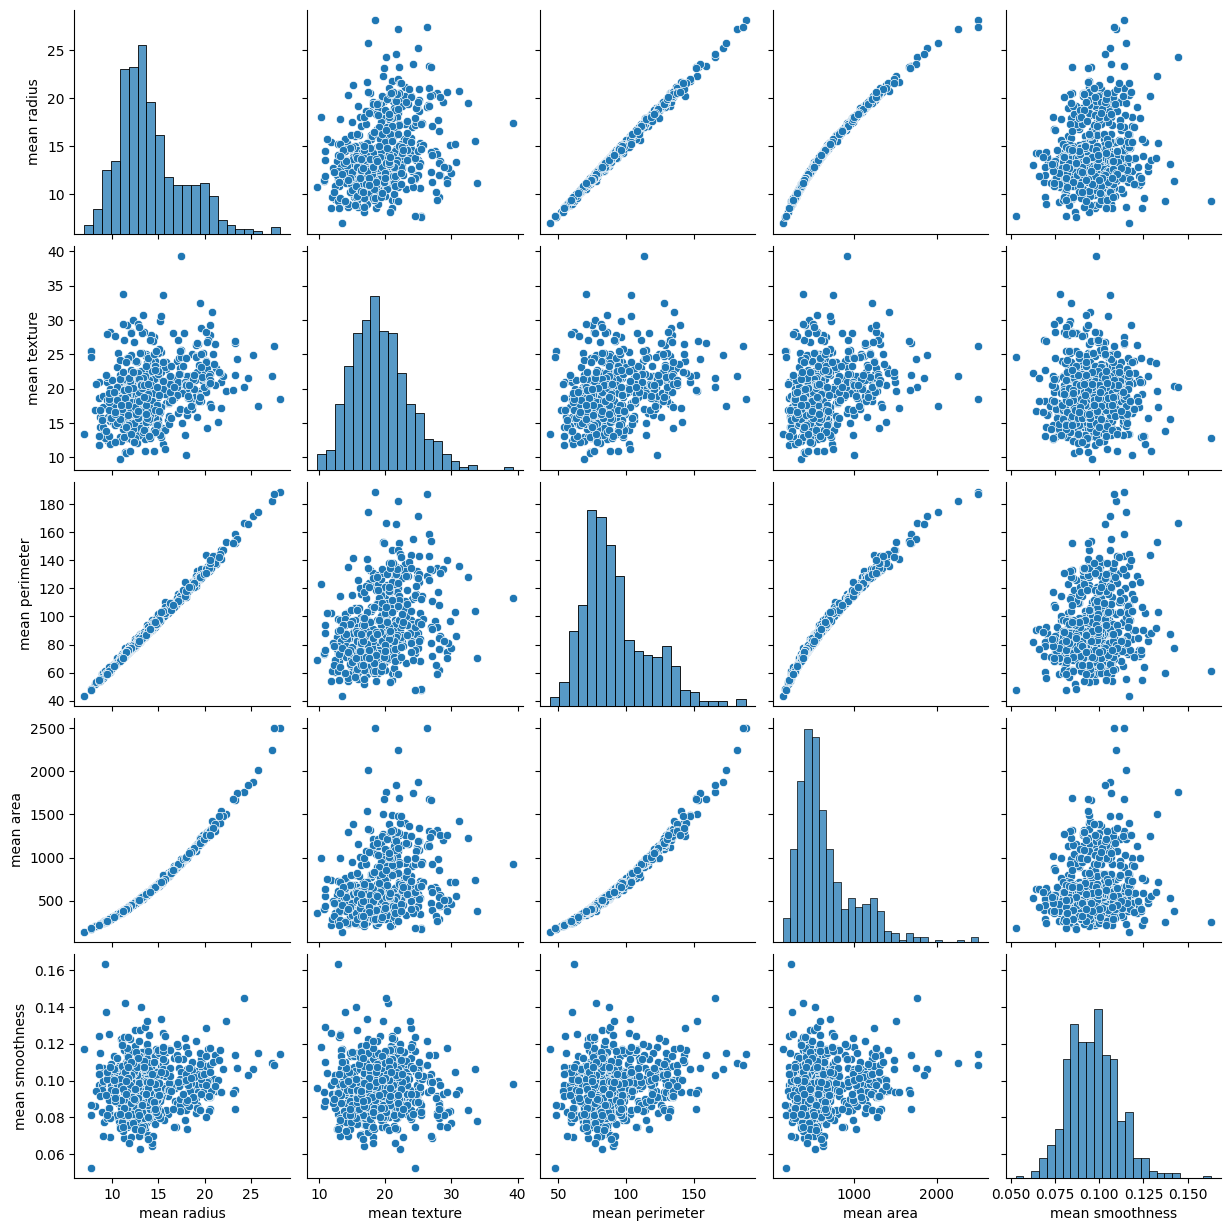

In [120]:
# Create a pairplot for the first few features

features_first_five = df.data.columns[:5]
subset_df = df.data[features_first_five]

# Create a pairplot
sns.pairplot(subset_df)
plt.show()


In [121]:
# Create a correlation coefficeint heatmap

df.data.corr()
df.data.corr().style.background_gradient(cmap='coolwarm')

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,0.000111,0.164174,0.039830,-0.090170,0.401964,0.559837,0.446630,0.341198,0.345007,0.688132,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


## Is the multicollinearity assumption broken?

## Answer:
There are high correlation factors in the following:

    mean radius and mean perimeter
    mean radius and mean area
    mean perimeter and mean area
    worst radius and worst perimeter
    worst radius and worst area
    worst perimeter and worst area
    
Due to the correlation matrix showing a strong relationship between various features and/or predictors. We can say that multicollinearity exists. Multicollinearity happens when two or more predictors are highly correlated (correlation coefficients approaching +1 or -1), indicating redundancy. The features are still linearly related due to the high correlations and so multicollinearity is not broken.



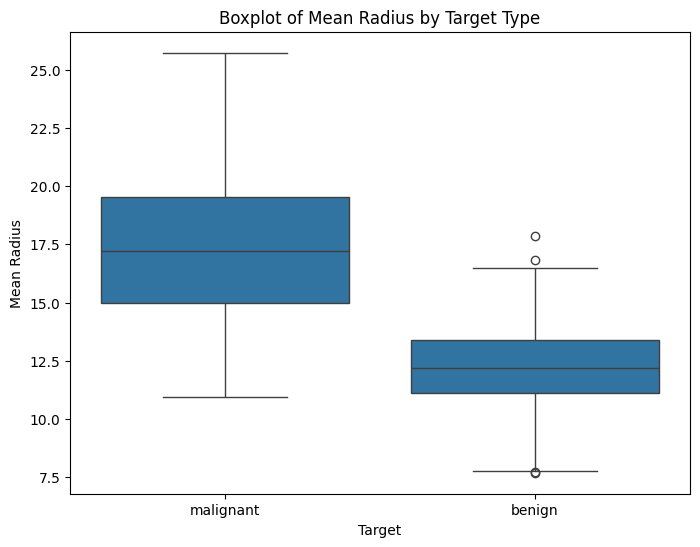

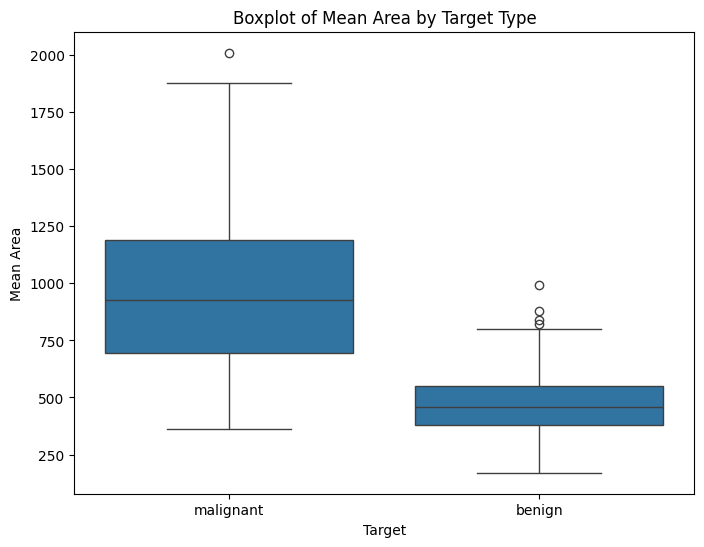

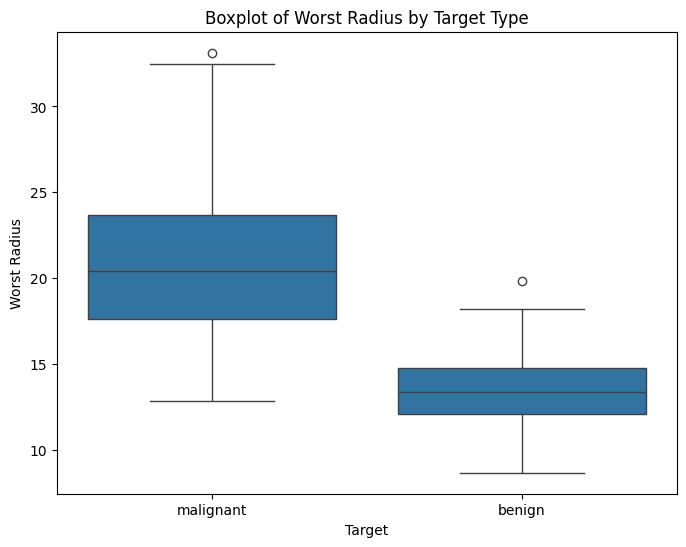

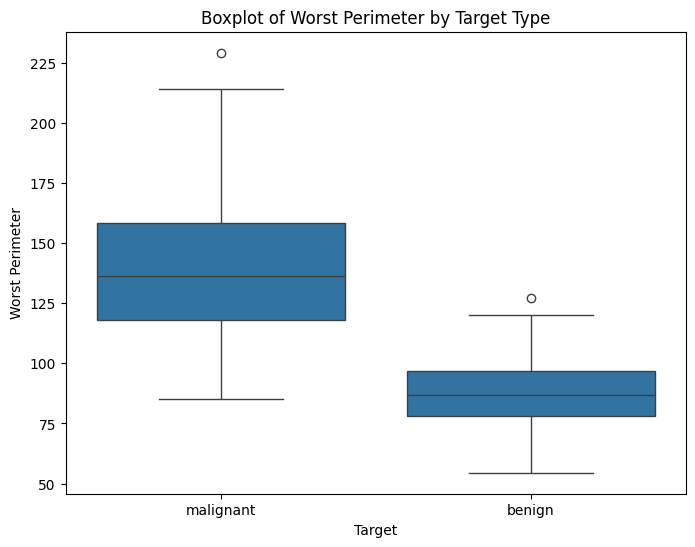

In [176]:
# Create a boxplot for mean radius by target type

df_combined = df_features
df_combined['target'] = df['target']
# Plot boxplot for 'mean radius' by target
plt.figure(figsize=(8, 6))
sns.boxplot(x='target', y='mean radius', data=df_combined)
plt.xlabel('Target')
plt.ylabel('Mean Radius')
plt.title('Boxplot of Mean Radius by Target Type')
plt.xticks([0, 1], df.target_names)
plt.show()

# Create a boxplot for mean area by target type

df_combined = df_features
df_combined['target'] = df['target']
# Plot boxplot for 'mean area' by target
plt.figure(figsize=(8, 6))
sns.boxplot(x='target', y='mean area', data=df_combined)
plt.xlabel('Target')
plt.ylabel('Mean Area')
plt.title('Boxplot of Mean Area by Target Type')
plt.xticks([0, 1], df.target_names)
plt.show()

# Create a boxplot for worst radius by target type

df_combined = df_features
df_combined['target'] = df['target']
# Plot boxplot for 'worst radius' by target
plt.figure(figsize=(8, 6))
sns.boxplot(x='target', y='worst radius', data=df_combined)
plt.xlabel('Target')
plt.ylabel('Worst Radius')
plt.title('Boxplot of Worst Radius by Target Type')
plt.xticks([0, 1], df.target_names)
plt.show()

# Create a boxplot for worst perimeter by target type

df_combined = df_features
df_combined['target'] = df['target']
# Plot boxplot for 'worst perimeter' by target
plt.figure(figsize=(8, 6))
sns.boxplot(x='target', y='worst perimeter', data=df_combined)
plt.xlabel('Target')
plt.ylabel('Worst Perimeter')
plt.title('Boxplot of Worst Perimeter by Target Type')
plt.xticks([0, 1], df.target_names)
plt.show()

## Analysis of Box Plots:

Above there are samples different box plots of target values for highly correlated variables displayed in the heat graph. In the boxplots, we can see that there are potential outliers, especially concerning malignant target values.

The outliers tend to skew beyond the third quartile rather than below the first quartile meaning that the data might appear to be higher than it is.

We can look closer at these data points between the boxplots to see the outliers and determine if they should be removed.

In [179]:
sorted_mean_radius = df_combined['mean radius'].sort_values(ascending=False)
print(sorted_mean_radius)
sorted_mean_area = df_combined['mean area'].sort_values(ascending=False)
print(sorted_mean_area)
sorted_worst_radius = df_combined['worst radius'].sort_values(ascending=False)
print(sorted_worst_radius)
sorted_worst_perimeter = df_combined['worst perimeter'].sort_values(ascending=False)
print(sorted_worst_perimeter)

82     25.220
521    24.630
122    24.250
339    23.510
202    23.290
        ...  
151     8.219
46      8.196
568     7.760
538     7.729
539     7.691
Name: mean radius, Length: 569, dtype: float64
82     1878.0
521    1841.0
122    1761.0
339    1747.0
164    1686.0
        ...  
151     203.9
46      201.9
568     181.0
538     178.8
539     170.4
Name: mean area, Length: 569, dtype: float64
265    32.490
236    31.010
503    30.790
368    30.750
339    30.670
        ...  
151     9.092
538     9.077
46      8.964
314     8.952
539     8.678
Name: worst radius, Length: 569, dtype: float64
265    214.00
82     211.70
503    211.50
108    206.80
236    206.00
        ...  
151     58.08
46      57.26
538     57.17
314     56.65
539     54.49
Name: worst perimeter, Length: 569, dtype: float64


## Analysis of Data:

From the above data, it appears that 3 outliers are present, 461 and 352 (on the high-end) and 101 (on the low-end) that could skew our dataset. For these two outliers, we will make the high correlation averages in the following:

*   mean radius
*   mean area
*   worst radius
*   worst perimeter

the average of the dataset and rerun the boxplots to see if the data is less skewed.


In [177]:
# Find the average of the following high correlation values
mean_radius_value = sorted_mean_radius.mean()
mean_area_value = sorted_mean_area.mean()
worst_radius_value = sorted_worst_radius.mean()
worst_perimeter_value = sorted_worst_perimeter.mean()

print('Mean Radius:', mean_radius_value)
print('Mean Area:', mean_area_value)
print('Worst Radius:', worst_radius_value)
print('Worst Perimeter:', worst_perimeter_value)

# Replace the values for 461 and 101 with the average value:

df_combined.at[101, 'mean radius'] = mean_radius_value
df_combined.at[101, 'mean area'] = mean_area_value
df_combined.at[101, 'worst radius'] = worst_radius_value
df_combined.at[101, 'worst perimeter'] = worst_perimeter_value

df_combined.at[461, 'mean radius'] = mean_radius_value
df_combined.at[461, 'mean area'] = mean_area_value
df_combined.at[461, 'worst radius'] = worst_radius_value
df_combined.at[461, 'worst perimeter'] = worst_perimeter_value

df_combined.at[352, 'mean radius'] = mean_radius_value
df_combined.at[352, 'mean area'] = mean_area_value
df_combined.at[352, 'worst radius'] = worst_radius_value
df_combined.at[352, 'worst perimeter'] = worst_perimeter_value


Mean Radius: 14.068905390087133
Mean Area: 646.4990446656639
Worst Radius: 16.19867444503816
Worst Perimeter: 106.7658433226979


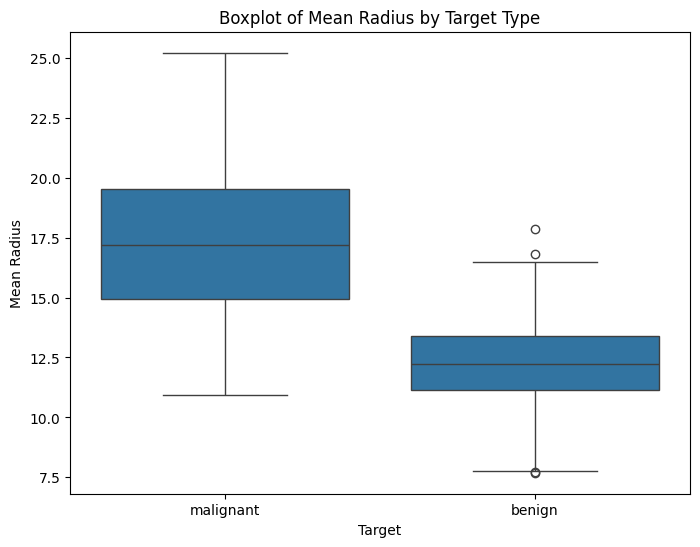

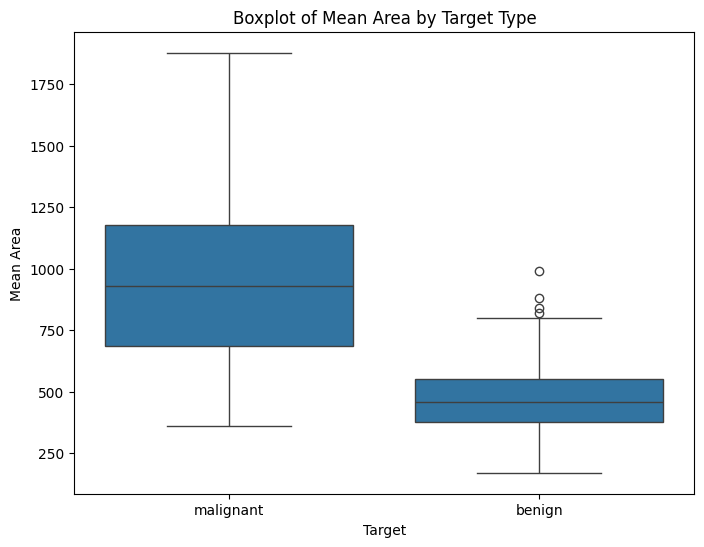

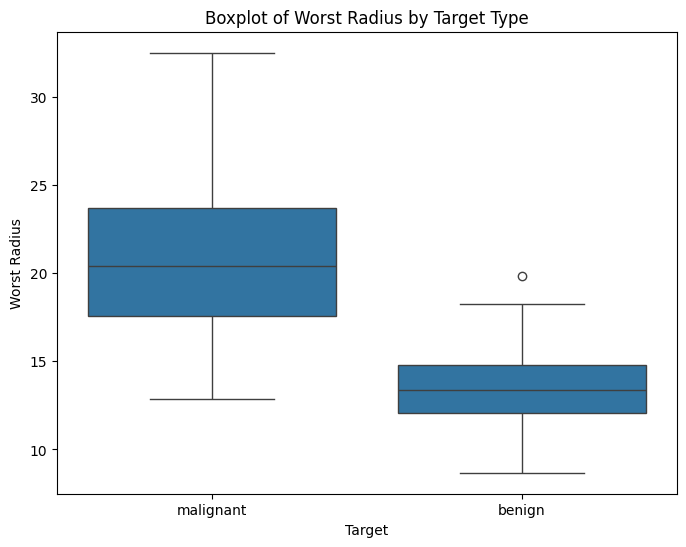

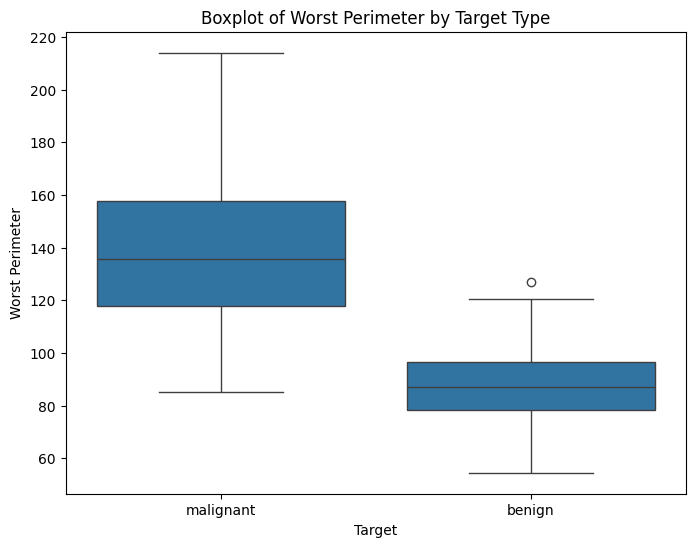

In [178]:
df_combined = df_features
df_combined['target'] = df['target']
# Plot boxplot for 'mean radius' by target
plt.figure(figsize=(8, 6))
sns.boxplot(x='target', y='mean radius', data=df_combined)
plt.xlabel('Target')
plt.ylabel('Mean Radius')
plt.title('Boxplot of Mean Radius by Target Type')
plt.xticks([0, 1], df.target_names)
plt.show()

df_combined = df_features
df_combined['target'] = df['target']
# Plot boxplot for 'mean area' by target
plt.figure(figsize=(8, 6))
sns.boxplot(x='target', y='mean area', data=df_combined)
plt.xlabel('Target')
plt.ylabel('Mean Area')
plt.title('Boxplot of Mean Area by Target Type')
plt.xticks([0, 1], df.target_names)
plt.show()

# Create a boxplot for worst radius by target type

df_combined = df_features
df_combined['target'] = df['target']
# Plot boxplot for 'worst radius' by target
plt.figure(figsize=(8, 6))
sns.boxplot(x='target', y='worst radius', data=df_combined)
plt.xlabel('Target')
plt.ylabel('Worst Radius')
plt.title('Boxplot of Worst Radius by Target Type')
plt.xticks([0, 1], df.target_names)
plt.show()

# Create a boxplot for worst perimeter by target type

df_combined = df_features
df_combined['target'] = df['target']
# Plot boxplot for 'worst perimeter' by target
plt.figure(figsize=(8, 6))
sns.boxplot(x='target', y='worst perimeter', data=df_combined)
plt.xlabel('Target')
plt.ylabel('Worst Perimeter')
plt.title('Boxplot of Worst Perimeter by Target Type')
plt.xticks([0, 1], df.target_names)
plt.show()

## Analysis continued...

As we can see, with the outliers normalized, we are noticing that target, malignant now has no outliers. However, benign continues to have outliers after normalizing the other varibles. At this point, we can start suspecting that there might be significant data concerning target, benign that needs to be analyzed further without disrupting target, malignant values.

With a better feel for the data, it's time to attempt to build a logistic regression model.

1. Use [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to create a training and test sets for the data.
2. Use [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) to train a model on the training data. Make sure you understand the inputs to the model. Try using the "liblinear" solver here.

In [180]:
# Split data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(df.data, df.target, test_size=0.3, random_state=42)

In [181]:
# Build and train logistic regression model

df_model = LogisticRegression(solver='liblinear')
df_model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

As you can see, training a logistic regression model is simple. The more important task is evaluating the model and determining if it's any good. For classification problems, a good starting point for model evaluation is the [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html).

A confusion matrix is a fundamental tool for evaluating the performance of a classification model. It provides a clear and detailed breakdown of how well a model's predictions align with the actual outcomes in a binary classification problem. It's particularly useful for understanding the types of errors a model is making.

A confusion matrix is typically presented as a table with four entries:

- **True Positives (TP):** The number of instances that were correctly predicted as positive (belonging to the positive class).

- **True Negatives (TN):** The number of instances that were correctly predicted as negative (belonging to the negative class).

- **False Positives (FP):** Also known as a Type I error. The number of instances that were predicted as positive but actually belong to the negative class.

- **False Negatives (FN):** Also known as a Type II error. The number of instances that were predicted as negative but actually belong to the positive class.

Here's how these four components fit into the confusion matrix:

```
                Predicted
               |  Positive  |  Negative
Actual  Positive |    TP      |    FN
        Negative |    FP      |    TN
```

Each cell of the confusion matrix represents a specific classification outcome. The goal is to have as many instances as possible in the TP and TN cells, and as few as possible in the FP and FN cells.

From the confusion matrix, several evaluation metrics can be calculated:

- **Accuracy:** The proportion of correctly classified instances out of the total instances.

   `Accuracy = (TP + TN) / (TP + TN + FP + FN)`

- **Precision:** The proportion of correctly predicted positive instances out of all predicted positive instances. It measures the model's ability to avoid false positives.

   `Precision = TP / (TP + FP)`

- **Recall (Sensitivity or True Positive Rate):** The proportion of correctly predicted positive instances out of all actual positive instances. It measures the model's ability to capture all positive instances.

   `Recall = TP / (TP + FN)`

- **F1-Score:** The harmonic mean of precision and recall. It provides a balanced measure that takes into account both false positives and false negatives.

   `F1-Score = 2 * (Precision * Recall) / (Precision + Recall)`

Confusion matrices provide valuable insights into the strengths and weaknesses of a classification model. They allow you to understand where the model is making mistakes and guide further improvements or adjustments.

Here are your tasks:

1. Use your model to make predictions on the test data.
2. Generate a confusion matrix with the test results. How many false positives and false negatives did the model predict?
3. Use [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) to generate further analysis of your model's predictions. Make sure you understand everything in the report and are able to explain what all the metrics mean.

Note, the macro average in the report calculates the metrics independently for each class and then takes the average across all classes. In other words, it treats all classes equally, regardless of their frequency in the dataset. This can be useful when you want to assess the model's overall performance without being biased by the class imbalances.

The weighted average in the report, on the other hand, calculates the metrics for each class and then takes the average, weighted by the number of true instances for each class. This gives more weight to classes with more instances, which can be particularly useful in imbalanced datasets where some classes might have much fewer instances than others.

In [182]:
# Evaluate the model

y_pred = df_model.predict(X_test)

In [183]:
# Generate a confusion matrix

confusion_matrix(y_test, y_pred)

array([[ 59,   4],
       [  2, 106]])

In [184]:
# Generate a classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        63
           1       0.96      0.98      0.97       108

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



## Analysis on the Classification Report:

From what we are seeing, the precision for determining that there are no malignant or benign values in sample or, class 0, is accurate up to 97% or instances that the model's predictions were correct.
It had a recall of 94% or instance that were correctly identified.
It had an F1-score of 95% or balancing precision and recall so we can see the estimate that there are very few false positives and false negatives
It had a support, or number of instances for 0, of 63 which is the number of instances in the dataset.

For class 1, or where the sample did have malignant or benign values, we see an accuracy of 96%.
It had a recall of 98% or instance that were correctly identified.
It had an F1-score of 97% or balancing precision and recall so we can see the estimate that there are very few false positives and false negatives
It had a support, or number of instances for 0, of 108 which is the number of instances in the dataset.

The overall accuracy of the model is 96% for signs of malignant or begnin values from the breast cancer predicition list. Therefore, this will be a good model to compare to other such patients.


Feature importance refers to the process of determining and quantifying the contribution of each feature (also known as predictor variable or attribute) in a machine learning model towards making accurate predictions. It helps in understanding which features have the most significant impact on the model's output and can be crucial for interpreting and explaining the model's behavior.

In logistic regression models, you can calculate feature importance by examining the coefficients associated with each feature. These coefficients indicate the change in the log-odds of the target variable for a one-unit change in the corresponding feature, while keeping other features constant. The magnitude of the coefficient reflects the strength of the impact that the feature has on the predicted outcome.

The magnitude of the coefficients indicates the importance of each feature. Larger magnitudes imply a stronger impact on the predicted probability of the positive class.

**Positive Coefficient**: An increase in the feature value leads to an increase in the log-odds of the positive class, implying a higher probability of belonging to the positive class.

**Negative Coefficient**: An increase in the feature value leads to a decrease in the log-odds of the positive class, implying a lower probability of belonging to the positive class.

Remember that the scale of the features matters when interpreting coefficients. If features are on different scales, their coefficients won't be directly comparable. This is where normalization can be helpful. Also, keep in mind that this interpretation assumes a linear relationship between the features and the log-odds of the target variable. If your logistic regression model includes interactions or polynomial terms, the interpretation can become more complex. Additionally, be cautious about interpreting coefficients as causal relationships, as logistic regression only captures associations, not causal effects.

Here are your tasks:

1. Extract the model coefficients from your trained model.
2. Normalize the coefficients by the standard deviation of each feature in the training data.
3. Sort feature names and coefficients by absolute value of coefficients.
4. Visualize the feature importances by creating a horizontal bar chart using e.g. [barh](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.barh.html). Based on magnitude, what appears to be the most important predictor of cancer in this dataset?

In [186]:
# Extract coefficients

coefficients = df_model.coef_
print(coefficients)

[[ 2.18079787e+00  1.59116583e-01 -1.29301097e-01 -3.77127026e-03
  -1.29812222e-01 -4.14130835e-01 -6.55194502e-01 -3.48032150e-01
  -2.01974927e-01 -2.98266889e-02 -6.53032211e-02  1.40273515e+00
   1.11930707e-01 -1.08801589e-01 -1.44518191e-02 -2.74281990e-02
  -6.55706777e-02 -4.09196804e-02 -4.91799185e-02 -1.09816680e-03
   1.16358840e+00 -3.90246552e-01 -7.48878942e-02 -2.15526804e-02
  -2.40665642e-01 -1.15211411e+00 -1.58323978e+00 -6.14622007e-01
  -7.28327379e-01 -1.12456658e-01]]


In [198]:
# Normalize the coefficients by the standard deviation

std_dev = np.std(coefficients)
normalized_coefficients = coefficients / std_dev

print("Standard Deviation:", std_dev)
print("Normalized Coefficients:", normalized_coefficients)

Standard Deviation: 0.6770039356821
Normalized Coefficients: [[ 3.22124844e+00  2.35030513e-01 -1.90990171e-01 -5.57052931e-03
  -1.91745151e-01 -6.11711119e-01 -9.67785367e-01 -5.14076997e-01
  -2.98336415e-01 -4.40568915e-02 -9.64591455e-02  2.07197488e+00
   1.65332431e-01 -1.60710424e-01 -2.13467284e-02 -4.05140909e-02
  -9.68542046e-02 -6.04423079e-02 -7.26434750e-02 -1.62209810e-03
   1.71873211e+00 -5.76431733e-01 -1.10616631e-01 -3.18353843e-02
  -3.55486326e-01 -1.70178347e+00 -2.33859760e+00 -9.07855885e-01
  -1.07580967e+00 -1.66109311e-01]]


In [247]:
# Sort feature names and coefficients by absolute value of coefficients

sorted_indices = np.argsort(np.abs(coefficients.flatten()))
sorted_coefficients = coefficients.flatten()[sorted_indices]
sorted_feature_names = df.feature_names[sorted_indices]

print("Sorted Feature Names:", sorted_feature_names)
print("Sorted Coefficients:", sorted_coefficients)


Sorted Feature Names: ['fractal dimension error' 'mean area' 'smoothness error' 'worst area'
 'compactness error' 'mean fractal dimension' 'concave points error'
 'symmetry error' 'radius error' 'concavity error' 'worst perimeter'
 'area error' 'perimeter error' 'worst fractal dimension' 'mean perimeter'
 'mean smoothness' 'mean texture' 'mean symmetry' 'worst smoothness'
 'mean concave points' 'worst texture' 'mean compactness'
 'worst concave points' 'mean concavity' 'worst symmetry'
 'worst compactness' 'worst radius' 'texture error' 'worst concavity'
 'mean radius']
Sorted Coefficients: [-1.09816680e-03 -3.77127026e-03 -1.44518191e-02 -2.15526804e-02
 -2.74281990e-02 -2.98266889e-02 -4.09196804e-02 -4.91799185e-02
 -6.53032211e-02 -6.55706777e-02 -7.48878942e-02 -1.08801589e-01
  1.11930707e-01 -1.12456658e-01 -1.29301097e-01 -1.29812222e-01
  1.59116583e-01 -2.01974927e-01 -2.40665642e-01 -3.48032150e-01
 -3.90246552e-01 -4.14130835e-01 -6.14622007e-01 -6.55194502e-01
 -7.28327379

Text(0.5, 1.0, 'Feature Importances')

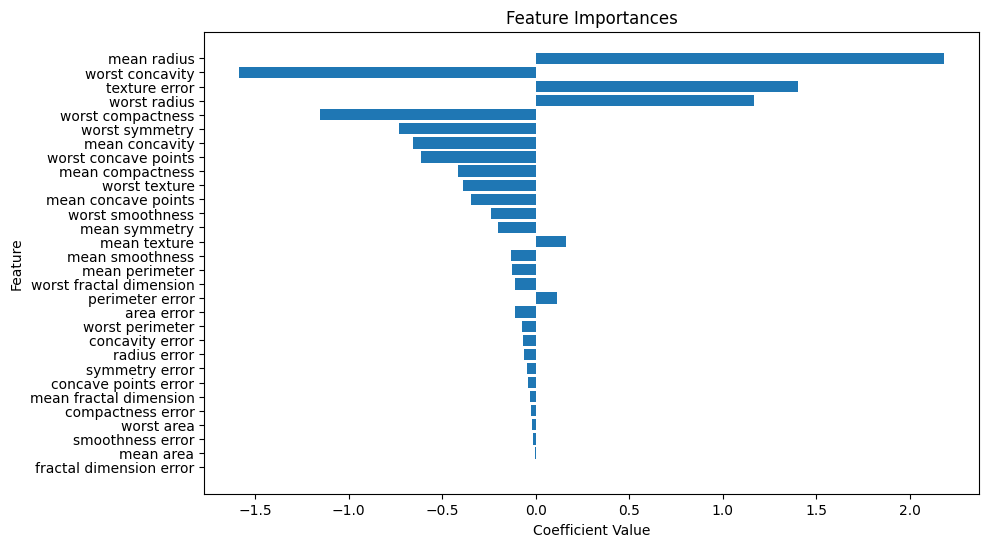

In [250]:
# Visualize feature importances

df_feature_importances = pd.DataFrame({'Feature': sorted_feature_names, 'Coefficient': sorted_coefficients})
plt.figure(figsize=(10, 6))
plt.barh(df_feature_importances['Feature'], df_feature_importances['Coefficient'])
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importances')

## Based on magnitude, what appears to be the most important predictor of cancer in this dataset?

## Answer:

The most important predictor of cancer in this dataset is the mean radius has a coefficient of ~+2.0, which shows the most significant positive impact. This suggests that with a higher mean radius value, there is a strongly associated likelihood of breast cancer.

# Final Data Summary:

The Final summary suggests that out of the 30 prediction features of breast cancer with an emphasis on the tumor size, we can see that the most important factor for finding breast cancer lies in the mean radius of the tumor. This comes with a coefficient of ~+2.0. We can also summarize that the Worst concavity at ~-1.7 suggests that there is a decreased risk prediction of breast cancer.

Other factors to note is texture error with a ~+1.4 value which can be associated with breast cancer and should be looked at as well as worst radius with a coefficient value of ~1.25.

The data suggests that the features related to the shape and size of the tumor are highly influencial to the prediction of breast cancer in a patient. Irregularities in the shape and an increase in size are the primary indicators that breast cancer will be found.

While features with negative coefficients show that there are higher values in areas that will exhibit benign cases. It is important to look at both when indicating whether a patient has breast cancer.

This analysis helps us see which features are most important and can point us in the right direction for choosing features, understanding the clinical aspect, and improving the model.